In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics 
from sklearn.metrics import accuracy_score 
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud, STOPWORDS
import spacy
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Loading the data 

In [ ]:
df = pd.read_csv('data\UpdatedResumeDataSet.csv')

df.dropna(inplace=True)
df.count()
df['Cleaned_Resume']=''
print(df.head())



       Category                                             Resume  \
0  Data Science  Skills * Programming Languages: Python (pandas...   
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...   
2  Data Science  Areas of Interest Deep Learning, Control Syste...   
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...   
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...   

  Cleaned_Resume  
0                 
1                 
2                 
3                 
4                 


In [3]:
print('jobs category:',df.Category.unique())

print('number of job skills: ',len(df.Category.unique()))

jobs category: ['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
number of job skills:  25


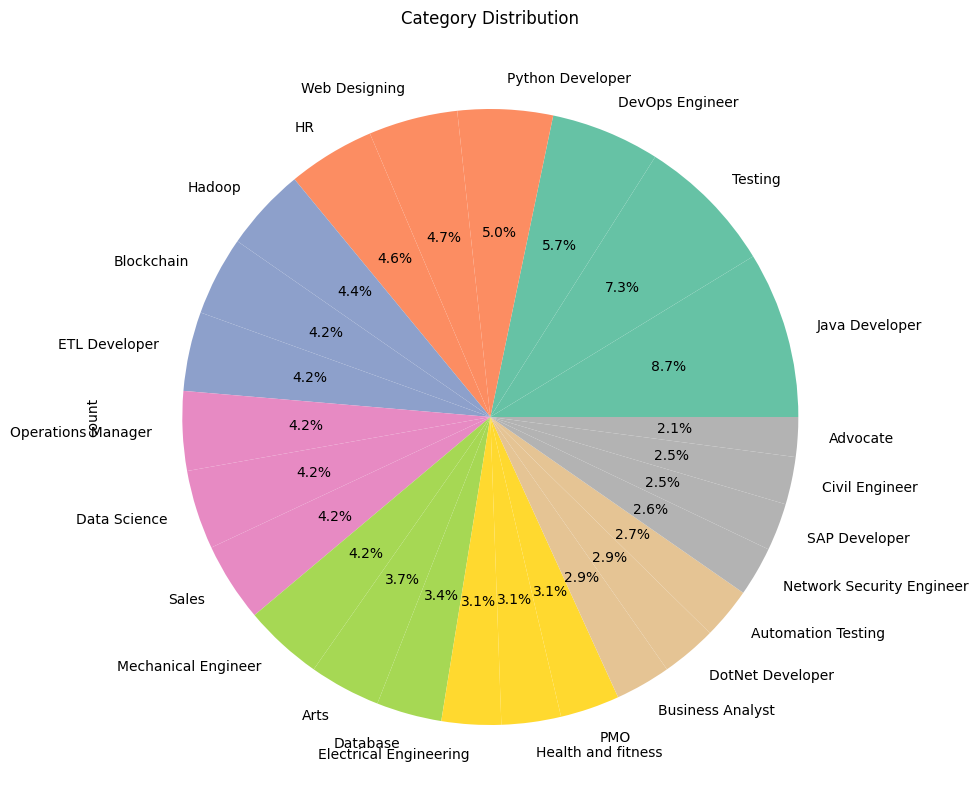

In [4]:

# Assuming 'df' is already defined and contains the 'Category' column
spread = df['Category'].value_counts()

plt.rcParams['figure.figsize'] = (10,10)
spread.plot(kind='pie', autopct='%1.1f%%',cmap='Set2')
plt.title('Category Distribution')
plt.show()


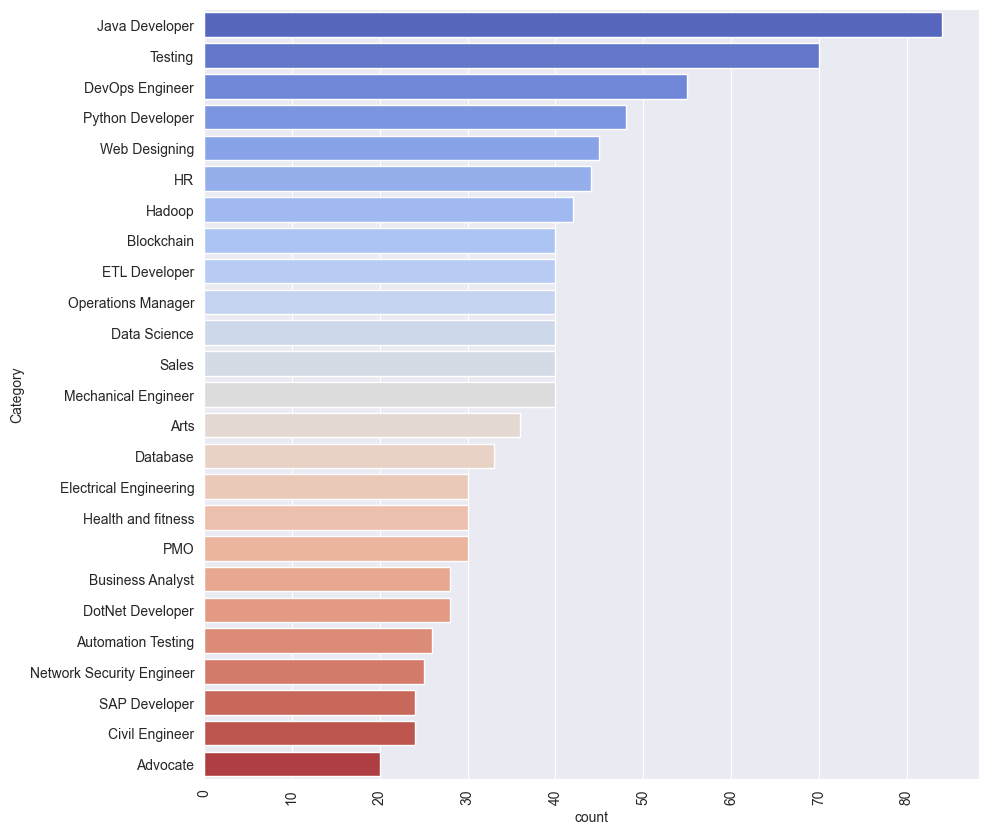

In [5]:
import seaborn as sns
sns.set_style('darkgrid')

plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette='coolwarm')
plt.show()

In [6]:
import re

def cleanResume(resumeText):
    
    resumeText=re.sub("http\S+\s+"," ",resumeText )
    resumeText=re.sub(r'RT|CC'," ",resumeText)
    resumeText=re.sub('#\S+'," ", resumeText)
    resumeText=re.sub('@\S+'," ", resumeText)
    resumeText = re.sub(r'[^\w\s]', ' ', resumeText)


    resumeText=re.sub('\s+'," ", resumeText)
    resumeText = re.sub(r'[^\x00-\x7f]' , r' ' , resumeText)

    return resumeText

df['Cleaned_Resume']=df['Resume'].apply(lambda x:cleanResume(x))

df['Cleaned_Resume']



    


0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills   R   Python   SAP HANA   Tableau   SAP...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills   Proficient in MS office Word...
958      Willingness to accept the challenges   Posit...
959    PERSONAL SKILLS   Quick learner   Eagerness to...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Cleaned_Resume, Length: 962, dtype: object

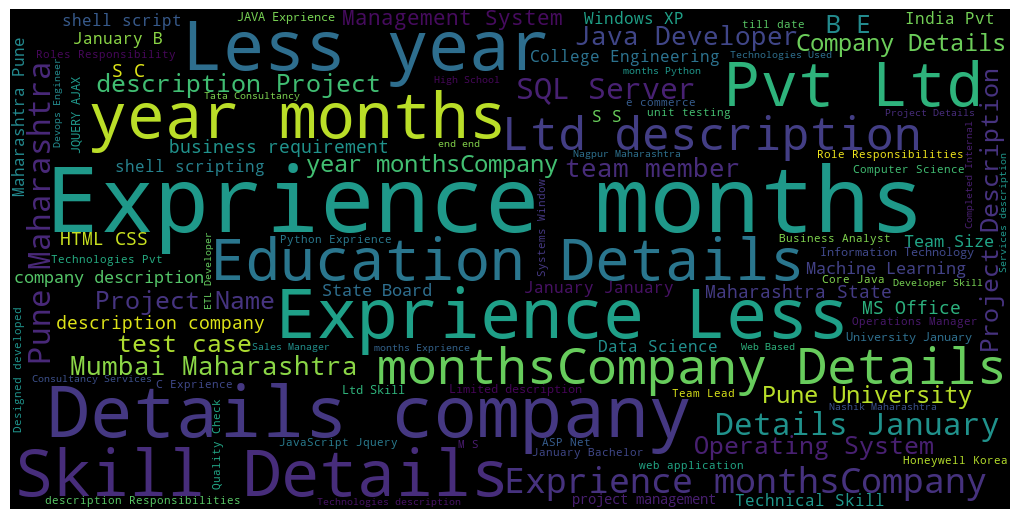

In [7]:

stop_words = set(STOPWORDS)

# Assuming df is your DataFrame and 'Cleaned_Resume' is the column with text data
comment_words = ""

# Combine all resumes into one string
text_data = " ".join(df['Cleaned_Resume'].astype(str))

# Tokenize and filter
tokens = text_data.split()  # Simple tokenization by splitting on whitespace
for token in tokens:
    if (token.lower() not in stop_words and token.isalpha() ):  # Check for stopwords and non-alphabetic tokens
        comment_words += token + " "  # Append token text with a space

# Generate the word cloud
word_cloud = WordCloud(width=1000, height=500, stopwords=stop_words,
min_font_size=10, max_words=1000).generate(comment_words)

# Create a figure and display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')  # Correctly turn off the axis
plt.tight_layout(pad=0)  # Adjust layout
plt.show()


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

requiredTarget=df['Category'].values
requiredText=df['Cleaned_Resume'].values
X_train, X_test, y_train, y_test=train_test_split(requiredText, requiredTarget,test_size=.20, random_state=42)
pipeline=Pipeline([
    ('categorizer',TfidfVectorizer()),
    ('cm',MultinomialNB())
    ])
pred=pipeline.fit(X_train, y_train)

y_pred=pred.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print(X_train.shape)
print(X_test.shape)
print(f'Accuracy: {accuracy:.4f}')




(769,)
(193,)
Accuracy: 0.9378


In [9]:
sample_resume = [
    "Experienced software engineer with a strong background in developing scalable web applications. Proficient in Python, Java, and JavaScript. Excellent problem-solving skills and a passion for technology."
]
# Predict the category for the sample resume
predicted_category = pred.predict(sample_resume)
print(f'Predicted category for the sample resume: {predicted_category[0]}')

Predicted category for the sample resume: Java Developer


In [16]:
# 1. Predict on test data
prediction = pipeline.predict(X_test)

# 2. Evaluate accuracy 
# (Note: I changed the text to 'Classifier' to be safe, or you can use 'Naive Bayes')
print('Accuracy on training set: {:.2f}'.format(pipeline.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(pipeline.score(X_test, y_test)))

# 3. Classification report (Fixed the quote and formatting)
print('\nClassification report for the classifier:\n')
print(classification_report(y_test, prediction))

Accuracy on training set: 0.95
Accuracy on test set: 0.94

Classification report for the classifier:

                           precision    recall  f1-score   support

                 Advocate       0.00      0.00      0.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      0.56      0.71         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR 